In [13]:
import os
import time
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [14]:
from keras.datasets import cifar10
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(float)
y_train = np.squeeze(y_train)

# Defining the test set
y_test = np.squeeze(y_test)
x_test = x_test.astype(float)

svm_train_accuracy = []
svm_test_accuracy = []
svm_labels = []

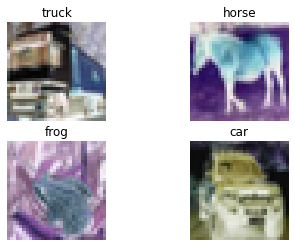

In [15]:
# Displaying sample images from the train and test set
plt.subplot(221)
plt.imshow((x_train[1] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[y_train[1]])
plt.subplot(222)
plt.imshow((x_train[7] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[y_train[7]])
plt.subplot(223)
plt.imshow((x_test[4] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[y_test[4]])
plt.subplot(224)
plt.imshow((x_test[9] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[y_test[9]])
plt.show()

In [16]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
y_train = np.squeeze(y_train)
print(x_train.shape)
print(x_train[0])

(50000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]


In [17]:
# Normalizing the data
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
print(x_train_norm[0])

[0.0091949  0.00966243 0.00981828 ... 0.01916902 0.0143378  0.01122089]


In [18]:
scale = StandardScaler()
x_train_s = scale.fit_transform(x_train)
x_test_s = scale.transform(x_test)

**SVM with Polynomial Kernel**\
After normalizing the data, the SVM model is trained on this data using a polynomial kernel to yield better results. 

In [19]:
def svm_kernel(kernel, C, gamma=1):
  svc = svm.SVC(probability = False, kernel = kernel, C = C, gamma=gamma)
  svc.fit(x_train_norm, y_train)

  # Predicting on the training set.
  train_predicted = svc.predict(x_train_norm)
  train_accuracy = accuracy_score(y_train, train_predicted)
  svm_train_accuracy.append(train_accuracy)
  print(f'Train Accuracy = {train_accuracy}')
    
  # Find the prediction and accuracy on the test set.
  test_predicted = svc.predict(x_test_norm)
  test_accuracy = accuracy_score(y_test, test_predicted)
  svm_test_accuracy.append(test_accuracy)
  print(f'Test Accuracy = {test_accuracy}') 

In [20]:
start = time.time()
print('SVM with Polynomial Kernel and C=0.3:')
poly_svm = svm_kernel('poly', 0.3)
svm_labels.append('Polynomial Kernel')
end = time.time()

SVM with Polynomial Kernel and C=0.3:
Train Accuracy = 0.4771
Test Accuracy = 0.4594


In [21]:
print(f'Time taken for training: {(end - start):.2f}s')

Time taken for training: 12868.96s
